In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.preprocessing import image
import keras.backend as K
import cv2
import sys

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


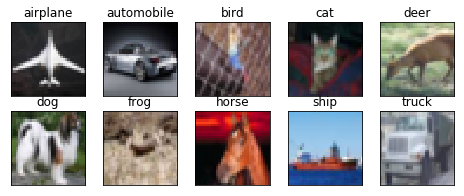

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [23]:
from keras.layers import Input
from keras.models import Model
# Define the model
input_img = Input(shape=(32,32,3))

# Conv Block1
c1 = Convolution2D(32, 3, 3, use_bias=False,name='layer1',border_mode='same')(input_img)  #3       32
c1 = BatchNormalization()(c1)
c1 = Activation('relu')(c1)
c1 = Dropout(0.25)(c1)

c2 = Convolution2D(64, 3, 3, use_bias=False,name='layer2',border_mode='same')(c1)        #5             32
c2 = BatchNormalization()(c2)
c2 = Activation('relu')(c2)
c2 = Dropout(0.25)(c2)

c3 = Convolution2D(128, 3, 3, use_bias=False,name='layer3',border_mode='same')(c2)         #7                      32
c3 = BatchNormalization()(c3)
c3 = Activation('relu')(c3)
c3 = Dropout(0.25)(c3)

# Transition Block1
t1 = MaxPooling2D(pool_size=(2, 2))(c3)                                                  #14             16
t1 = Convolution2D(32, 1, 1)(t1)


# Conv Block2
c4 = Convolution2D(64, 3, 3, use_bias=False,name='layer4',border_mode='same')(t1)          #16          16
c4 = BatchNormalization()(c4)
c4 = Activation('relu')(c4)
c4 = Dropout(0.25)(c4)

c5 = Convolution2D(128, 3, 3, use_bias=False,name='layer5',border_mode='same')(c4)            #18       16
c5 = BatchNormalization()(c5)
c5 = Activation('relu')(c5)
c5 = Dropout(0.25)(c5)

# Transition Block2
t2 = MaxPooling2D(pool_size=(2, 2))(c5)                                                       #36       8
t2 = Convolution2D(32, 1, 1)(t2)

# Conv Block3
c6 = Convolution2D(64, 3, 3, use_bias=False,name='layer6',border_mode='same')(t2)              #38     8
c6 = BatchNormalization()(c6)
c6 = Activation('relu')(c6)
c6 = Dropout(0.25)(c6)

c7 = Convolution2D(128, 3, 3, use_bias=False,name='layer7',border_mode='same')(c6)               #40     8
c7 = BatchNormalization()(c7)
c7 = Activation('relu')(c7)
c7 = Dropout(0.25)(c7)

# Final Block3
f = Convolution2D(10, 1, 1)(c7)
f = Dropout(0.25)(f)
f = GlobalAveragePooling2D()(f)

#model.add(Flatten())

a = Activation('softmax')(f)

model = Model(inputs=input_img, outputs=a)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, name="layer1", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, name="layer2", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, name="layer3", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, name="layer4", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
layer1 (Conv2D)              (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 32, 32, 64)        18432     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
__________

In [25]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Epoch 1/50
  2/390 [..............................] - ETA: 28s - loss: 0.3084 - acc: 0.9023

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  


390/390 [==============================] - 24s 61ms/step - loss: 0.3660 - acc: 0.8706 - val_loss: 0.4920 - val_acc: 0.8362
Epoch 2/50
390/390 [==============================] - 23s 60ms/step - loss: 0.3661 - acc: 0.8714 - val_loss: 0.5743 - val_acc: 0.8053
Epoch 3/50
390/390 [==============================] - 24s 60ms/step - loss: 0.3670 - acc: 0.8695 - val_loss: 0.6950 - val_acc: 0.7686
Epoch 4/50
390/390 [==============================] - 23s 60ms/step - loss: 0.3558 - acc: 0.8741 - val_loss: 0.5090 - val_acc: 0.8322
Epoch 5/50
390/390 [==============================] - 24s 60ms/step - loss: 0.3616 - acc: 0.8718 - val_loss: 0.4859 - val_acc: 0.8343
Epoch 6/50
390/390 [==============================] - 24s 60ms/step - loss: 0.3498 - acc: 0.8768 - val_loss: 0.5177 - val_acc: 0.8253
Epoch 7/50
390/390 [==============================] - 24s 60ms/step - loss: 0.3533 - acc: 0.8742 - val_loss: 0.5313 - val_acc: 0.8224
Epoch 8/50
390/390 [==============================] - 24s 60ms/step - los

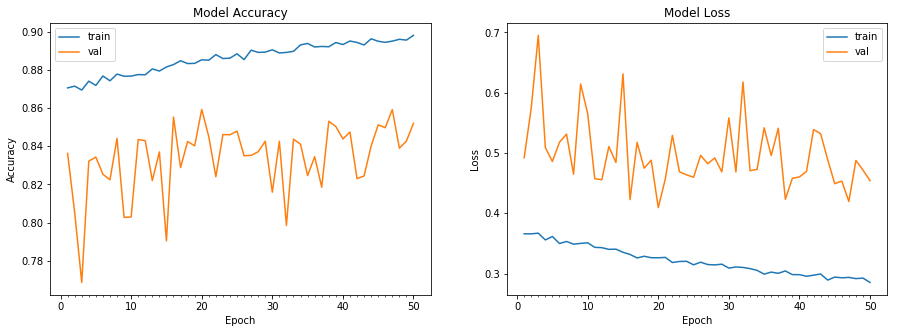

Accuracy on test data is: 85.20


In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1))

checkpoint = ModelCheckpoint('drive/My Drive/Colab Notebooks/EVA/Assignment 9/Weights/Assignment9_partB.hdf5',monitor='acc',save_weights_only=False,save_best_only = True,mode='auto')
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [31]:
y_pred = model.predict_generator(datagen.flow(test_features, test_labels,shuffle=False, batch_size = 128),steps=len(test_features)/128)

y_pred_argmax = np.argmax(np.rint(y_pred), axis=1)

y_argmax = np.argmax(np.rint(test_labels), axis=1)
index= []

for x in range(y_pred_argmax.shape[0]):
  if y_pred_argmax[x] != y_argmax[x]:
    index.append(x)
    
print(len(index))

2003


In [0]:
def getHeatMapFromLayer(layer_name,image):
  x = np.expand_dims(image, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

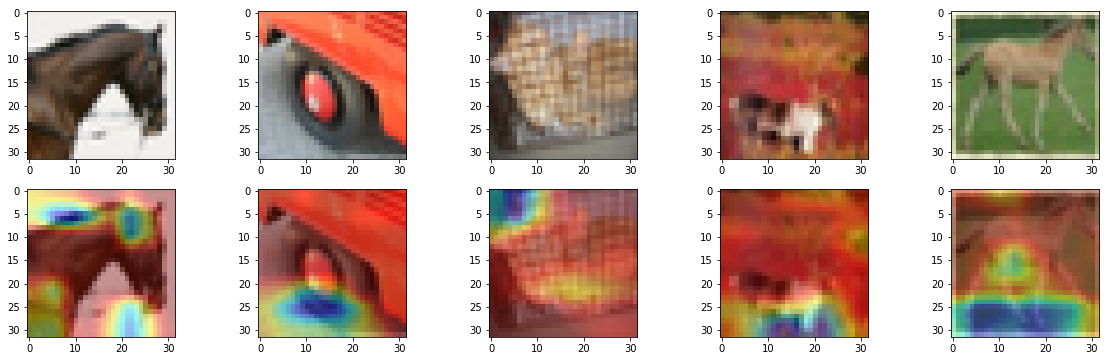

In [35]:
import random 

#fig,ax = plt.subplots(1,figsize = (8, 8))
fig, ax = plt.subplots(2, 5, figsize = (20,6))

for i in range(5):
  img = test_features[index[random.randint(0,len(index))]]*255
  heatmap = getHeatMapFromLayer('conv2d_9',img)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype(float), 0.6, heatmap.astype(float), 0.4, 0)
  ax[0, i].imshow(img/255)
  ax[1, i].imshow(superimposed_img/255)
  
plt.show()